In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import gdown

# Google Drive file ID of the dataset as provided in Task Document
file_id = "1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ"

path = "proj_dir/data/dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", path, quiet=False)

In [ ]:
!unzip "proj_dir/data/dataset.zip" -d "proj_dir/data/"

In [ ]:
# paths to the folders
train_path = "proj_dir/dataset/train/"
val_path = "proj_dir/dataset/val/"

# Listing classes to verify
classes = sorted(os.listdir(train_path))
print(f"Classes: {classes}")

# Loading a sample image
sample_class = classes[0]  # First class
sample_file = os.listdir(os.path.join(train_path, sample_class))[0]  # First image
sample_path = os.path.join(train_path, sample_class, sample_file)

# Load the .npy image file
image = np.load(sample_path)
print(f"Image shape: {image.shape}")

Classes: ['no', 'sphere', 'vort']
Image shape: (1, 150, 150)


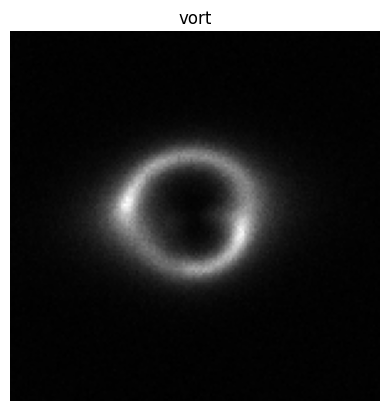

In [ ]:
import random

def show_image(image_path, title=""):
    image = np.load(image_path)  # Load the .npy image
    image = image.squeeze(0)  #dim (1, 150, 150) → (150, 150)

    plt.imshow(image, cmap="gray")  # Use grayscale colormap
    plt.title(title)
    plt.axis("off")
    plt.show()

# Example Image from the first class
train_path = "proj_dir/dataset/train/"
classes = sorted(os.listdir(train_path))
sample_class = classes[0]  # first class
sample_file = os.listdir(os.path.join(train_path, sample_class))[0]  # Pick first image
sample_path = os.path.join(train_path, sample_class, sample_file)

show_image(sample_path, title=sample_class)


838
5184
5027


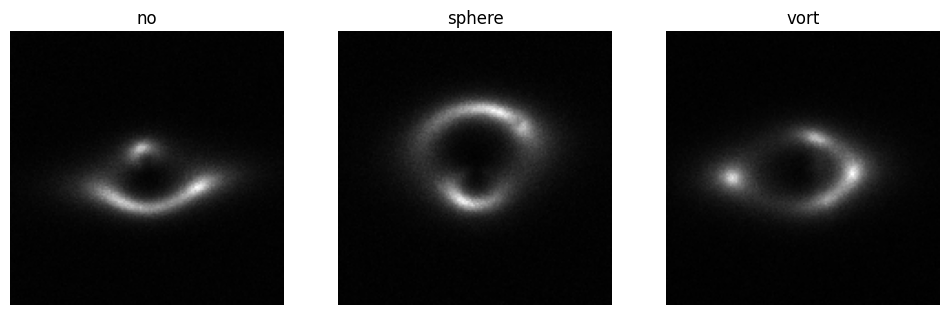

4373
3121
9418


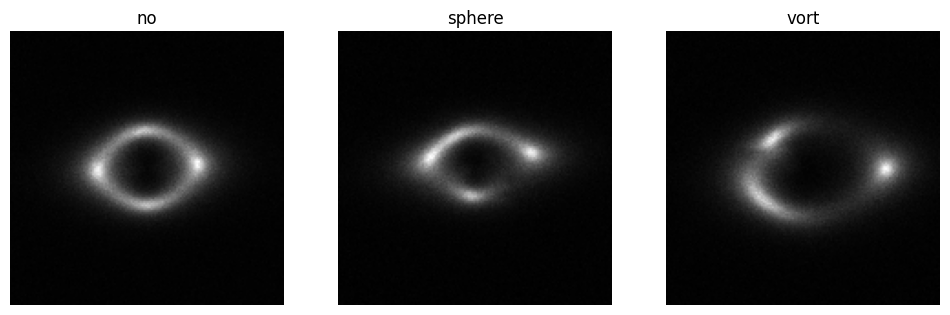

6063
8461
4353


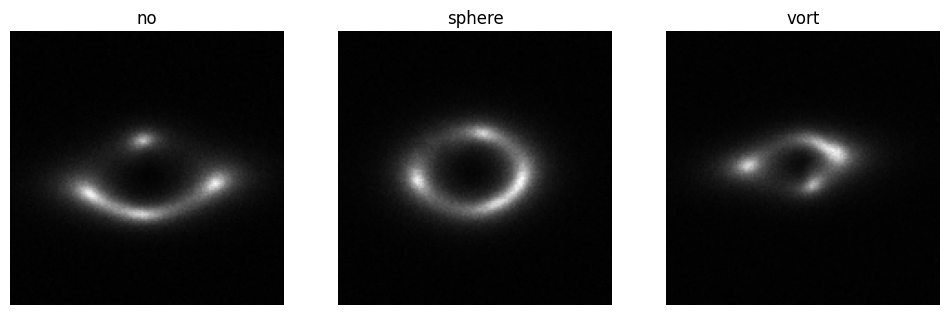

4665
8783
3692


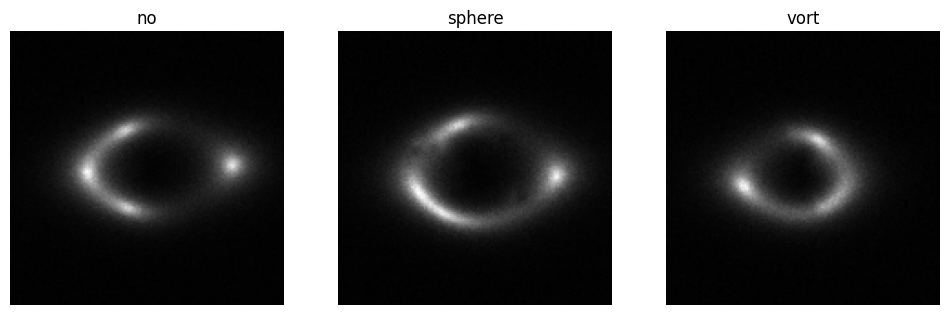

507
8432
1544


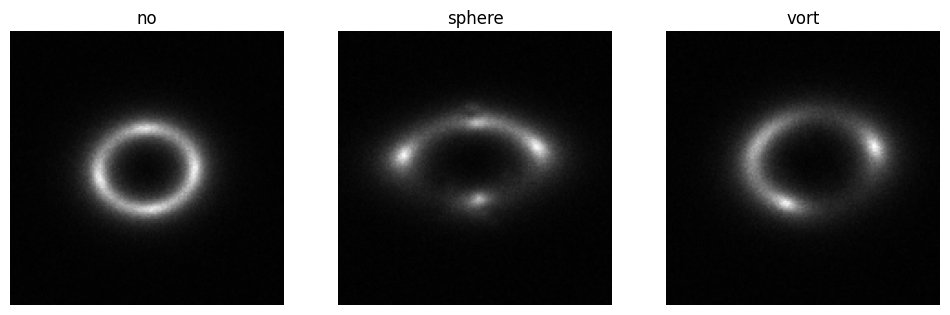

In [ ]:
def images_classwise(train_path, num_samples=1):
    classes = sorted(os.listdir(train_path))

    fig, axes = plt.subplots(1, len(classes), figsize=(12, 4))

    for i, class_name in enumerate(classes):
        class_files = os.listdir(os.path.join(train_path, class_name))
        if class_files:
            k = random.randrange(0, 10000, 1)
            sample_path = os.path.join(train_path, class_name, class_files[k])
            image = np.load(sample_path).squeeze(0)  # Remove channel dim
            print(k)#Print the sample number
            axes[i].imshow(image, cmap="gray")
            axes[i].set_title(class_name)
            axes[i].axis("off")

    plt.show()

# One image per class
for i in range(5):
  images_classwise(train_path)

Testing the data.py module uploaded at ./src/, and ensuring all tensor shapes are as expected :

In [ ]:
ROOT_DIR = "proj_dir"

# Move to root directory
os.chdir(ROOT_DIR)

# Add src/ to sys.path for module imports
sys.path.append(os.path.join(ROOT_DIR, "src"))

In [ ]:
from data_npy import get_dataloaders

batch_size = 32 #will choose optimal batch size while training
data_dir = "proj_dir/dataset/"

# DataLoaders
train_loader, val_loader = get_dataloaders(data_dir, batch_size=batch_size, num_workers=0)

# Testing the batch shape
images, labels = next(iter(train_loader))
print(f"Image Batch Shape: {images.shape}")
print(f"Label Batch Shape: {labels.shape}")

# Verifing the labels(0,1,2)
print("Labels in first batch:", labels.tolist())

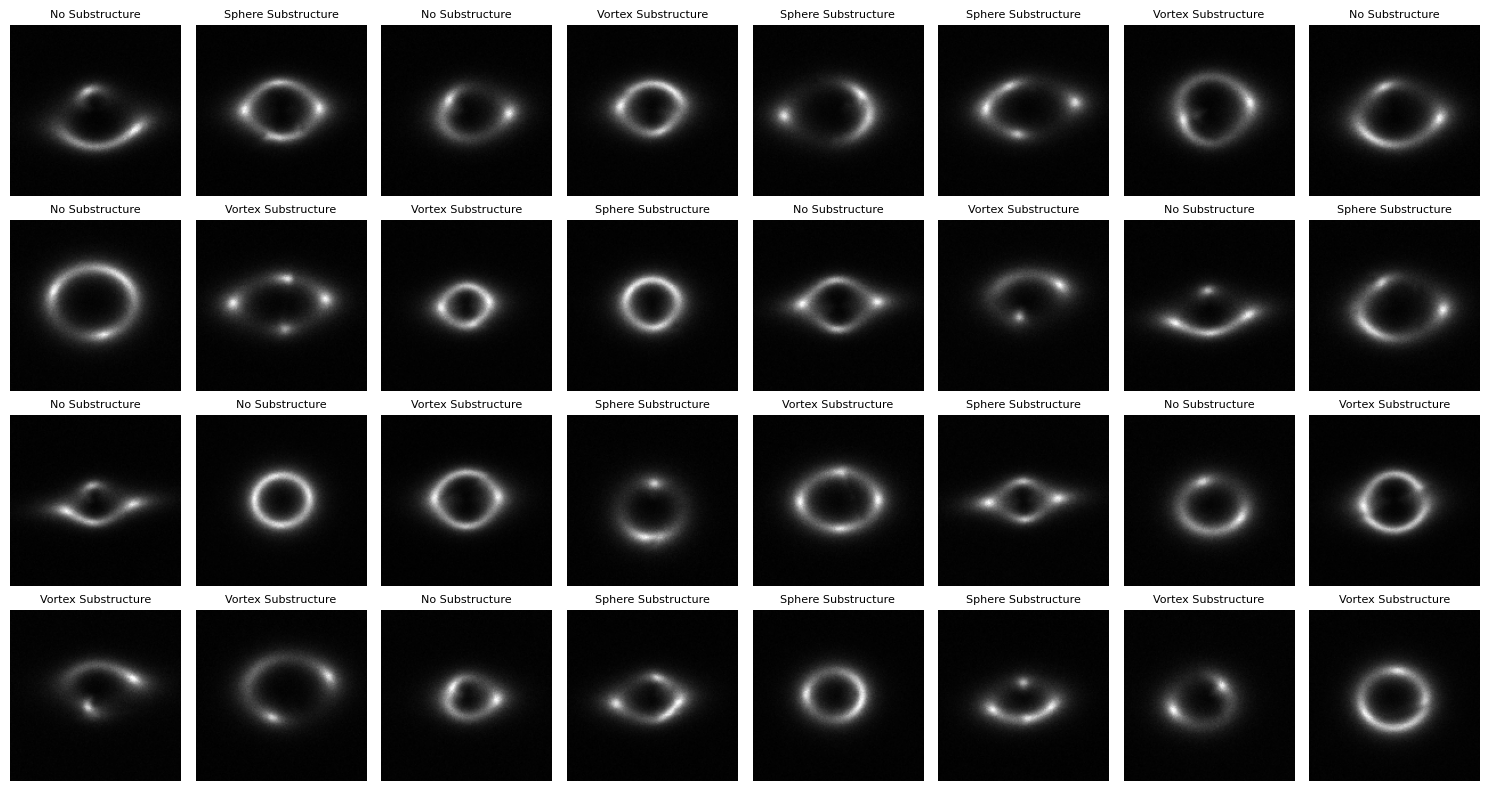

In [ ]:
# Bulk Visulaization
class_names = {0: "No Substructure", 1: "Sphere Substructure", 2: "Vortex Substructure"}

# Get a batch from train_loader
images, labels = next(iter(train_loader))

# Converting to NumPy for visualization
images = images.numpy()
labels = labels.numpy()

# Plot images
fig, axes = plt.subplots(4, 8, figsize=(15, 8))  # 4 rows, 8 cols (32)
axes = axes.flatten()

for i in range(32):  # Plotting first 32 images in batch for ex
    img = images[i, 0, :, :]  # Extracting the ith image
    label = labels[i]

    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(class_names[label], fontsize=8)
    axes[i].axis("off")

plt.tight_layout()
plt.show()
